In this example, we generate data from the Friedman function at fit a model with `pyBASS`.

In [1]:
import pyBASS as pb
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Friedman function (Friedman, 1991, Multivariate Adaptive Regression Splines)
def f(x):
    return (10. * np.sin(np.pi * x[:, 0] * x[:, 1]) + 20. * (x[:, 2] - .5) ** 2 
            + 10 * x[:, 3] + 5. * x[:, 4])


n = 500 # sample size
p = 10 # number of predictors (only 5 are used)
x = np.random.rand(n, p) # training inputs
xx = np.random.rand(1000, p) # test inputs
y = f(x) + np.random.normal(size=n) * 0.1 # noisy training outputs
ftest = f(xx)
ytest = ftest + np.random.normal(size=1000) * 0.1 # noisy test outputs


Fit the BMARS model with and see the results with

BASS MCMC Complete. Time: 3.236959 seconds.


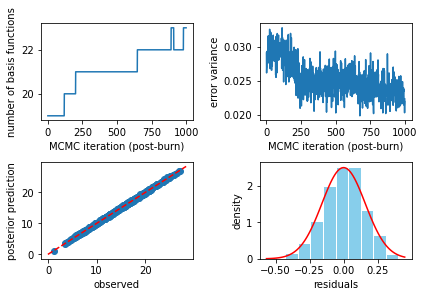

In [3]:
mod = pb.bass(x, y)
mod.plot()

The following gives the posterior predictions of the BMARS mean model.

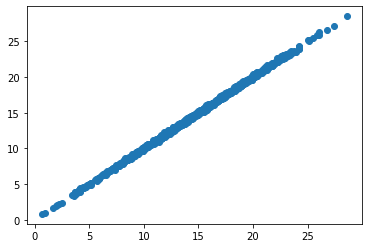

In [4]:
fpred = mod.predict(xx)
plt.scatter(ftest, fpred.mean(axis=0)) # posterior mean prediction vs noisless test outputs
plt.show()

To get full prediction uncertainty, use the `nugget=True` option.  For instance, below we predict at just one new input setting.  The distribution of predictions represents both uncertainty in the BMARS mean as well as predictive variance (e.g., measurement error).

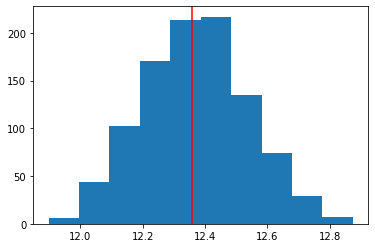

In [5]:
ypred = mod.predict(xx, nugget=True)
plt.hist(ypred[:, 40])
plt.axvline(ytest[40], color='red')
plt.show()

We can calculate the empirical coverage of the uncertainty from our test set predictions by forming a probability interval for each prediction (in this case, 95%), and counting how many intervals capture the corresponding true values.

In [6]:
quantiles = np.quantile(ypred, [0.025, .975], axis=0)
np.mean((quantiles[0] < ytest) * (quantiles[1] > ytest))

0.947